Referências: 
- HUANG, Zhexue. Extensions to the k-means algorithm for clustering large data sets with categorical values. Data mining and knowledge discovery, v. 2, n. 3, p. 283-304, 1998.
- https://sproutsocial.com/pt/insights/new-social-media-demographics-pt_br/- 
- https://www.alura.com.br/curso-online-cluster-analysis
- GERON, A. Mãos à Obra Aprendizado de Máquina com Scikit-learn & TensorFlow: Conceitos. Ferramentas e Técnicas Para a Construção de Sistemas Inteligentes, p. 576, 2019
- https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3
- https://dwdigital.com.br/canais-de-marketing-para-alcancar-a-geracao-z/
- https://www.next4.com.br/marketing-digital-para-idosos-crescimento-exponencial-nos-ultimos-anos-e-muita-oportunidade-para-sua-empresa/
- https://consumidormoderno.com.br/2021/06/18/estrategias-marketing-geracao-x/

In [496]:
# Evitar mensagens de warning
import warnings
warnings.filterwarnings("ignore") 

In [497]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [498]:
# Importando as bases de dados
portfolio = pd.read_csv(r'C:\Users\USER\Desktop\vaga estágio\portfolio_ofertas.csv')
clientes =  pd.read_csv(r'C:\Users\USER\Desktop\vaga estágio\dados_clientes.csv')
eventos =   pd.read_csv(r'C:\Users\USER\Desktop\vaga estágio\eventos_ofertas.csv', encoding='latin-1')

## 1.0 Observação inicial e limpeza das bases de dados

### 1.1 Data frame de portfólio

### 

In [499]:
portfolio

,Unnamed: 0,recompensa,canal,valor_minimo,duracao,id,oferta
0,1,10,"['email', 'mobile', 'social']",10,7,ae264e3637204a6fb9bb56bc8210ddfd,"compre 1, leve 2"
1,2,10,"['web', 'email', 'mobile', 'social']",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,"compre 1, leve 2"
2,3,0,"['web', 'email', 'mobile']",0,4,3f207df678b143eea3cee63160fa8bed,informativo
3,4,5,"['web', 'email', 'mobile']",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,"compre 1, leve 2"
4,5,5,"['web', 'email']",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,desconto
5,6,3,"['web', 'email', 'mobile', 'social']",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,desconto
6,7,2,"['web', 'email', 'mobile', 'social']",10,10,fafdcd668e3743c1bb461111dcafc2a4,desconto
7,8,0,"['email', 'mobile', 'social']",0,3,5a8bc65990b245e5a138643cd4eb9837,informativo
8,9,5,"['web', 'email', 'mobile', 'social']",5,5,f19421c1d4aa40978ebb69ca19b0e20d,"compre 1, leve 2"
9,10,2,"['web', 'email', 'mobile']",10,7,2906b810c7d4411798c6938adc9daaa5,desconto


In [500]:
# Coluna de index estava duplicada
portfolio = portfolio.drop(columns='Unnamed: 0')

In [501]:
# Checagem de tipos
portfolio.dtypes

recompensa       int64
canal           object
valor_minimo     int64
duracao          int64
id              object
oferta          object
dtype: object

Por se tratar de um DF de 10 linhas, é possível notar que não possui dados incoerentes

### 1.2 Data frame de clientes

In [502]:
clientes

,Unnamed: 0,genero,idade,id,membro_desde,renda_anual
0,1,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,2,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000
2,3,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,4,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,"1,00E+05"
4,5,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...,...
16995,16996,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000
16996,16997,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000
16997,16998,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000
16998,16999,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000


In [503]:
# Index duplicado
clientes = clientes.drop(columns='Unnamed: 0')

# Contagem de NaNs
clientes.isna().value_counts()

genero  idade  id     membro_desde  renda_anual
False   False  False  False         False          14825
True    False  False  False         True            2175
dtype: int64

In [504]:
clientes.shape

(17000, 5)

In [505]:
clientes.dtypes

genero          object
idade            int64
id              object
membro_desde     int64
renda_anual     object
dtype: object

É possível notar que a coluna de 'membro_desde' contém números inteiros. É preciso convertê-la para o tipo data:

In [506]:
# Converter coluna de inteiros em tipo data
clientes['membro_desde'] = pd.to_datetime(clientes['membro_desde'], format='%Y%m%d')
clientes['membro_desde'].tail(3)

16997   2017-01-26
16998   2016-03-07
16999   2017-07-22
Name: membro_desde, dtype: datetime64[ns]

Os dados de faltantes de renda e gênero ocorrem sempre em pares em todos os casos. O que pode indicar algum tipo de coleta ou registro de dados problemática. É possível verificar se a idade frequente de 118 anos ocorre juntamente com os outros dois problemas:

In [507]:
clientes.isna().value_counts()
clientes.tail(3)

,genero,idade,id,membro_desde,renda_anual
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000
16999,F,62,e4052622e5ba45a8b96b59aba68cf068,2017-07-22,82000


In [508]:
# Salvando os IDs removidos em outro para abatê-los do DF
ids_removidos = clientes[clientes['idade'] == 118]
ids_removidos = pd.Series(ids_removidos['id'])
ids_removidos

0        68be06ca386d4c31939f3a4f0e3dd783
2        38fe809add3b4fcf9315a9694bb96ff5
4        a03223e636434f42ac4c3df47e8bac43
6        8ec6ce2a7e7949b1bf142def7d0e0586
7        68617ca6246f4fbc85e91a2a49552598
                       ...               
16980    5c686d09ca4d475a8f750f2ba07e0440
16982    d9ca82f550ac4ee58b6299cf1e5c824a
16989    ca45ee1883624304bac1e4c8a114f045
16991    a9a20fa8b5504360beb4e7c8712f8306
16994    c02b10e8752c4d8e9b73f918558531f7
Name: id, Length: 2175, dtype: object

In [509]:
# Dados faltantes de gênero
clientes = clientes[clientes['idade'] != 118]
clientes.isna().value_counts()

genero  idade  id     membro_desde  renda_anual
False   False  False  False         False          14825
dtype: int64

Como o esperado, todos os registros com a idade notoriamente estranha de 118 anos eram os que também tinham renda e gênero como NaNs. Assim, não faria sentido completar com a média a renda ou mesmo aleatoriezar valores de gênero, pois isso apenas diluiria os dados relevantes e não seria mantida nenhuma informação relevante na base de dados. O melhor a se fazer realmente é descartar os dados incoerentes.

A renda anual deve ser convertida para algum tipo numérico para que seja utilizada estatisticamente

In [510]:
# Removendo a vírgula e a notação científica e convertendo para inteiro
clientes['renda_anual'] = clientes['renda_anual'].str.replace(',', '').astype(float).astype(int)
clientes['renda_anual']

1          112000
3        10000000
5           70000
8           53000
12          51000
           ...   
16995       54000
16996       72000
16997       73000
16998       50000
16999       82000
Name: renda_anual, Length: 14825, dtype: int32

In [511]:
clientes.describe()

,idade,renda_anual
count,14825.000000,1.482500e+04
mean,54.393524,1.235028e+05
std,17.383705,7.591561e+05
min,18.000000,3.000000e+04
25%,42.000000,4.900000e+04
50%,55.000000,6.400000e+04
75%,66.000000,8.000000e+04
max,101.000000,1.000000e+07


Os valores máximo e mínimo parecem coerentes para idade e renda

In [512]:
clientes.describe(include = ['object'])

,genero,id
count,14825,14825
unique,3,14825
top,M,0610b486422d4921ae7d2bf64640c50b
freq,8484,1


Não há IDs repetidos. 
Há 3 descrições descrições de gênero:

In [513]:
clientes['genero'].unique()

array(['F', 'M', 'O'], dtype=object)

### 1.3 Data frame de eventos

In [514]:
eventos

,Unnamed: 0,cliente,tempo_decorrido,valor,id_oferta,recompensa,tipo_evento
0,1,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,oferta recebida
1,2,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,oferta recebida
2,3,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,oferta recebida
3,4,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,oferta recebida
4,5,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,oferta recebida
...,...,...,...,...,...,...,...
306529,306530,b3a1272bc9904337b331bf348c3e8c17,714,1.59,NaN,NaN,transacao
306530,306531,68213b08d99a4ae1b0dcb72aebd9aa35,714,9.53,NaN,NaN,transacao
306531,306532,a00058cf10334a308c68e7631c529907,714,3.61,NaN,NaN,transacao
306532,306533,76ddbd6576844afe811f1a3c0fbb5bec,714,3.53,NaN,NaN,transacao


In [515]:
eventos.shape

(306534, 7)

In [516]:
eventos = eventos.drop(columns='Unnamed: 0')
eventos.isna().value_counts()

cliente  tempo_decorrido  valor  id_oferta  recompensa  tipo_evento
False    False            False  True       True        False          138953
                          True   False      True        False          134002
                                            False       False           33579
dtype: int64

Retirando os registros dos IDs que continham problemas de falta de informação já no DF de clientes

In [517]:
# Série contendo todos os registros com erros obtida na seção 2.2 
ids_removidos

0        68be06ca386d4c31939f3a4f0e3dd783
2        38fe809add3b4fcf9315a9694bb96ff5
4        a03223e636434f42ac4c3df47e8bac43
6        8ec6ce2a7e7949b1bf142def7d0e0586
7        68617ca6246f4fbc85e91a2a49552598
                       ...               
16980    5c686d09ca4d475a8f750f2ba07e0440
16982    d9ca82f550ac4ee58b6299cf1e5c824a
16989    ca45ee1883624304bac1e4c8a114f045
16991    a9a20fa8b5504360beb4e7c8712f8306
16994    c02b10e8752c4d8e9b73f918558531f7
Name: id, Length: 2175, dtype: object

In [518]:
# Indexar o DF usando  isin() para remover as linhas com valores na série 'ids_removidos'
eventos = eventos[~eventos['cliente'].isin(ids_removidos)]
eventos.isna().value_counts()

cliente  tempo_decorrido  valor  id_oferta  recompensa  tipo_evento
False    False            False  True       True        False          123957
                          True   False      True        False          116361
                                            False       False           32444
dtype: int64

É possível notar que os IDs que foram excluídos realmente se tratavam de erros, tendo em vista que nenhum registro foi apagado em meio a todos presentes na série 'ids_removidos'. 

In [519]:
eventos.dtypes

cliente             object
tempo_decorrido      int64
valor              float64
id_oferta           object
recompensa         float64
tipo_evento         object
dtype: object

In [520]:
eventos.describe()

,tempo_decorrido,valor,recompensa
count,272762.000000,123957.000000,32444.000000
mean,366.707694,13.996325,4.948249
std,200.359087,31.749420,2.905376
min,0.000000,0.050000,2.000000
25%,186.000000,3.660000,2.000000
50%,408.000000,10.800000,5.000000
75%,528.000000,19.130000,5.000000
max,714.000000,1062.280000,10.000000


As três variáveis numéricas parecem estar com valores coerentes, considerando o projeto

In [521]:
# Descrição de variáveis não numéricas
eventos.describe(include = ['object'])

,cliente,id_oferta,tipo_evento
count,272762,148805,272762
unique,14825,10,4
top,94de646f7b6041228ca7dec82adb97d2,fafdcd668e3743c1bb461111dcafc2a4,transacao
freq,51,18062,123957


Há exatamente o mesmo número de registros não nulos de clientes no DF eventos, bem como de IDs no DF clientes (14825 números únicos). O que indica que as suposições anteriores de que os registros problemáricos não passavam de erros era verdadeira.

In [522]:
# Visualização dos 10 IDs de oferta existentes na base de dados
eventos['id_oferta'].value_counts()

fafdcd668e3743c1bb461111dcafc2a4    18062
2298d6c36e964ae4a3e7e9706d1fb8c2    17920
f19421c1d4aa40978ebb69ca19b0e20d    16989
ae264e3637204a6fb9bb56bc8210ddfd    16241
4d5c57ea9a6940dd891ad53e9dbe8da0    16232
9b98b8c7a33c4b65b9aebfe6a799e6d9    14372
2906b810c7d4411798c6938adc9daaa5    14002
5a8bc65990b245e5a138643cd4eb9837    12516
0b1e1539f2cc45b7b9fa7c272da2e1d7    12327
3f207df678b143eea3cee63160fa8bed    10144
Name: id_oferta, dtype: int64

In [523]:
# Contagem dos tipos de evento
eventos['tipo_evento'].value_counts()

transacao             123957
oferta recebida        66501
oferta visualizada     49860
oferta concluída       32444
Name: tipo_evento, dtype: int64

Depreende-se que os valores correspondem exatamente às secções obtidas ao contarem-se as quantidades de na tabela. O que é um forte indicativo de que as categorias de oferta estão correlacionadas com colunas NaN ou não. Segue a checagem da conjectura:

In [524]:
# NaNs em evento 'transacao'
eventos[eventos['tipo_evento'] == 'transacao'].isna().value_counts()

cliente  tempo_decorrido  valor  id_oferta  recompensa  tipo_evento
False    False            False  True       True        False          123957
dtype: int64

Como o esperado, em todos os casos que há 'id_oferta' e 'recompensa' iguais a NaN, o 'tipo_evento' é 'transacao'.

In [525]:
# NaNs em evento 'oferta concluída'
eventos[eventos['tipo_evento'] == 'oferta concluída'].isna().value_counts()

cliente  tempo_decorrido  valor  id_oferta  recompensa  tipo_evento
False    False            True   False      False       False          32444
dtype: int64

Seguindo a lógica da célula imediatamente anterior, todos os casos em que o único NaN do registro ocorre na coluna 'valor', o evento 'oferta concluída' é o valor da coluna 'tipo_evento'.

Como consequência, em todos os demais casos ocorre NaN nas colunas de 'valor' e 'recompensa'. São todos registros que  possuem como valor na coluna de 'tipo_evento' como 'oferta visualizada' ou 'oferta recebida'.

## 2. Análise Exploratória de Dados (Clientes)

In [526]:
# Estilização das visualizações
tema = sns.set_theme(style='darkgrid')
cores = sns.color_palette("husl", 8)

In [527]:
# Observação das colunas presentes
clientes.columns

Index(['genero', 'idade', 'id', 'membro_desde', 'renda_anual'], dtype='object')

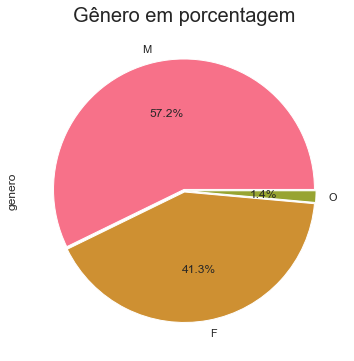

In [528]:
# Gráfico de pizza sobre gênero

clientes['genero'].value_counts().plot\
  .pie(autopct = '%1.1f%%', explode=(0.01, 0.01, 0.01), figsize =(6, 6),colors=cores)\
  .set_title('Gênero em porcentagem').set_fontsize('20')

In [529]:
# Função genérica para boxplot

def boxplot(coluna, max_y, titulo, data):
  f, ax = plt.subplots(figsize=(8, 6))
  fig = sns.boxplot(y=coluna, data=data)
  fig.set_title(titulo).set_fontsize('16')
  fig.axis(ymin = 0, ymax = max_y)

In [530]:
# Função genérica para violinplot

def violinplot(coluna, max_y, titulo, data):
  f, ax = plt.subplots(figsize=(8, 6))
  fig = sns.violinplot(y=coluna, data=data)
  fig.set_title(titulo).set_fontsize('16')
  fig.axis(ymin = 0, ymax = max_y)

In [531]:
# Separar as colunas por tipos para facilitar a análise

categoricas_clientes = clientes.dtypes == 'object'
categoricas_clientes = list(categoricas_clientes[categoricas_clientes].index)
categoricas_clientes.remove('id') # Coluna não importante para análise

numericas_clientes = clientes.dtypes != 'object'
numericas_clientes = list(numericas_clientes[numericas_clientes].index)

In [532]:
numericas_clientes

['idade', 'membro_desde', 'renda_anual']

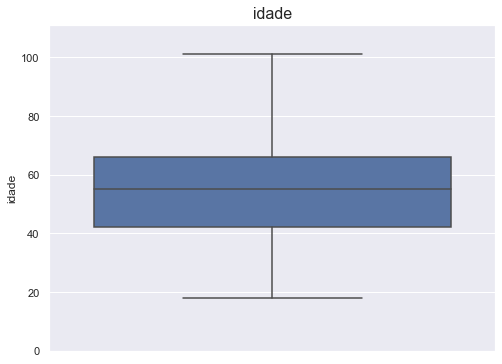

In [533]:
boxplot(coluna=numericas_clientes[0],
        data=clientes,
        max_y=1.1*max(clientes[numericas_clientes[0]]),
        titulo=numericas_clientes[0])

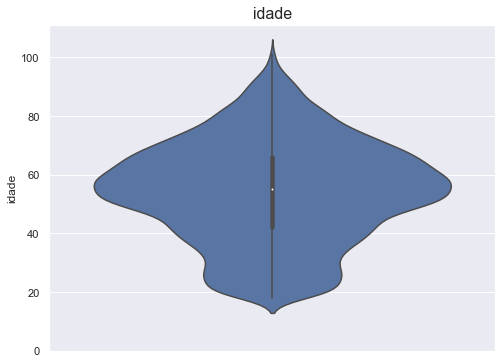

In [534]:
violinplot(coluna=numericas_clientes[0],
        data=clientes,
        max_y=1.1*max(clientes[numericas_clientes[0]]),
        titulo=numericas_clientes[0])

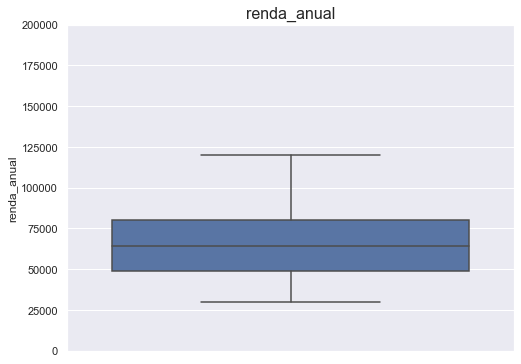

In [535]:
boxplot(coluna=numericas_clientes[2],
        data=clientes,
        max_y=200000,
        titulo=numericas_clientes[2])

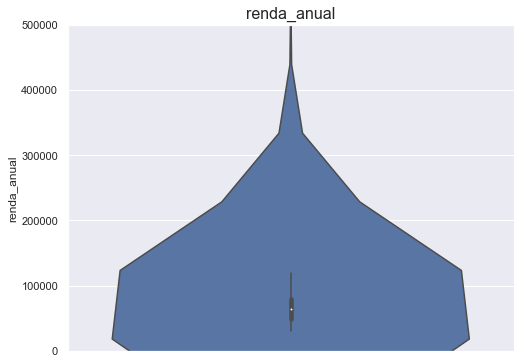

In [536]:
violinplot(coluna=numericas_clientes[2],
        data=clientes,
        max_y=500000,
        titulo=numericas_clientes[2])

## 3. Agrupamento ou clusterização

A estratégia para o presente tópico foi baseada principalmente em:
- Curso de clusterização com python da Alura: https://www.alura.com.br/curso-online-cluster-analysis
- Livro de ML: GERON, A. Mãos à Obra Aprendizado de Máquina com Scikit-learn & TensorFlow: Conceitos. Ferramentas e Técnicas Para a Construção de Sistemas Inteligentes, p. 576, 2019
- Página web: https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3

### 3.1 Preparação dos dados

Para agrupar os clientes é preciso que o DF esteja segundo o padrão requerido pelo algoritmo

In [537]:
clientes

,genero,idade,id,membro_desde,renda_anual
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,10000000
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000


In [538]:
# Substituindo os outliers de 'renda_anual' pelo valor médio da coluna sem eles

renda_media = clientes[clientes['renda_anual'] != 10000000]['renda_anual'].mean()
renda_media

65200.77351065273

In [539]:
# Alterar o valor das células na Coluna2 que são maiores que 30
clientes.loc[clientes['renda_anual'] == 10000000, 'renda_anual'] = int(renda_media)
clientes[clientes['renda_anual'] == int(renda_media)]


,genero,idade,id,membro_desde,renda_anual
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,65200
21,M,64,4b0da7e80e5945209a1fdddfe813dbe0,2017-09-09,65200
390,F,41,5084c3bf96464d63bc54f298ce45aef0,2016-04-14,65200
425,M,51,227f2d69e46a4899b70d48182822cff6,2018-05-12,65200
526,F,57,f92d608f58bf40178cc3c9568750c559,2018-01-17,65200
...,...,...,...,...,...
15605,M,41,269dce9ba8004504ae3a587a7df9db13,2015-10-24,65200
15943,M,65,6b1c9e0cc8a54186a4129131a1726738,2018-01-05,65200
16158,M,63,156e898fd57b431683d6e72e4ab6eb9c,2017-10-18,65200
16289,F,71,7b8d950572954f79b8f47809099c77e9,2018-07-12,65200


In [540]:
# Consertando o índice que está fora de ordem devido às retiradas de elementos
clientes.reset_index(drop=True)

,genero,idade,id,membro_desde,renda_anual
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,65200
2,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000
3,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000
...,...,...,...,...,...
14820,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000
14821,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000
14822,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000
14823,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000


De acordo com Huang (1998)¹, o algoritmo k-means não pode ser utilizado para agrupar variáveis cateóricas, tendo em vista que não tem sentido calcular algum tipo de distância euclidiana entre suas categorias. O autor chega a propor uma estratégia para que seja realizado o agrupamento misto, isso é, com variáveis de tipo categórico e outras de tipo numérico. No entanto, optou-se por se valer de uma solução simplificada para o problema por duas razões. Primeiramente por questões de complexidade. O fator mais importante, porém, é que para as estratégias de marketing utilizadas pela empresa, o gênero do cliente não é um fator que apresenta relevância aparentemente. Os  eventos de publicidade são feitos com base em tipos de informação ou ofertas, e atingem o cliente em canais de comunicação diversos para cada evento (web, e-mail, celular, etc). Para ambas as categorias o gênero não parece ter relação com a funcionalidade do marketing. Ao contrário de variáveis como renda, em que promoções tendem a ter um alto impacto. A variável de idade também é de se esperar que seja relevante, tendo em vista que certas redes sociais ou aplicativos e canais de comunicação são de preferência de certa faixa etária, ou mesmo feitos com design para tipos de usuário de certa idade. 
Como publicado pelo website Sprout Social, a faixa etária está bastante relacionada à utilização de cada rede social². 

¹ HUANG, Zhexue. Extensions to the k-means algorithm for clustering large data sets with categorical values. Data mining and knowledge discovery, v. 2, n. 3, p. 283-304, 1998.

² https://sproutsocial.com/pt/insights/new-social-media-demographics-pt_br/

In [541]:
# Para criar um perfil de clientes as colunas 'id' e 'membro_desde' não são úteis 
clientes_processado = clientes.drop(columns=['id', 'membro_desde', 'genero']).reset_index(drop=True)
clientes_processado

,idade,renda_anual
0,55,112000
1,75,65200
2,68,70000
3,65,53000
4,58,51000
...,...,...
14820,45,54000
14821,61,72000
14822,49,73000
14823,83,50000


In [542]:
# Ajustando a escala para o modelo.

# O ajuste de escala é necessário para que a magnitude dos valores não 
# desbalanceie o peso de cada coluna no processo de agrupamento.

scaler = StandardScaler()
clientes_processado = scaler.fit_transform(clientes_processado)
clientes_processado

array([[ 3.48887646e-02,  2.18347327e+00],
       [ 1.18543027e+00, -3.58772636e-05],
       [ 7.82740744e-01,  2.23913779e-01],
       ...,
       [-3.10273688e-01,  3.63882314e-01],
       [ 1.64564687e+00, -7.09209788e-01],
       [ 4.37578292e-01,  7.83787919e-01]])

In [543]:
clientes_processado = pd.DataFrame(data = clientes_processado,columns = ('idade_processada', 'renda_anual_processada'))

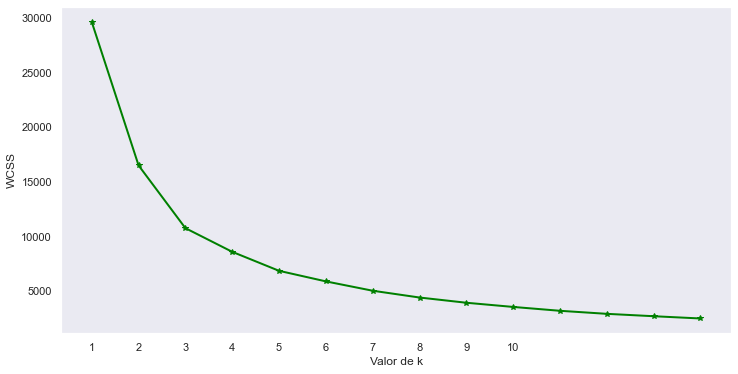

In [544]:
# Verificação do número ótimo de grupos através do Método de Elbow

wcss = [] # Cluster feito pela diferença quadrática

SEED = 101

for k in range(1,15):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=SEED)
    kmeans.fit(clientes_processado)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,15), wcss, linewidth=2, color='green', marker ='*')
plt.xlabel('Valor de k')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')
plt.show()

Pode-se notar que o número ótimo de grupos para a base com apenas as variáveis de idade e renda anual é 5. O chamado joelho da curva se localiza no ponto de valor de k = 5.

In [545]:
# Definição da função de agrupamento
km = KMeans(n_clusters=5)

# Define-se a qual grupo de cada cliente
grupos = km.fit_predict(clientes_processado)


AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

In [ ]:
clientes_processado

,idade_processada,renda_anual_processada
0,0.034889,2.183473
1,1.185430,-0.000036
2,0.782741,0.223914
3,0.610160,-0.569241
4,0.207470,-0.662554
...,...,...
14820,-0.540382,-0.522585
14821,0.380051,0.317226
14822,-0.310274,0.363882
14823,1.645647,-0.709210


In [550]:
# Coluna de grupo adicionada à base de dados do modelo
clientes_processado['grupo'] = grupos
clientes_processado

,idade_processada,renda_anual_processada,id,grupo
0,0.034889,2.183473,0610b486422d4921ae7d2bf64640c50b,2
1,1.185430,-0.000036,78afa995795e4d85b5d9ceeca43f5fef,1
2,0.782741,0.223914,e2127556f4f64592b11af22de27a7932,1
3,0.610160,-0.569241,389bc3fa690240e798340f5a15918d5c,3
4,0.207470,-0.662554,2eeac8d8feae4a8cad5a6af0499a211d,3
...,...,...,...,...
14820,-0.540382,-0.522585,6d5f3a774f3d4714ab0c092238f3a1d7,0
14821,0.380051,0.317226,2cb4f97358b841b9a9773a7aa05a9d77,4
14822,-0.310274,0.363882,01d26f638c274aa0b965d24cefe3183f,4
14823,1.645647,-0.709210,9dc1421481194dcd9400aec7c9ae6366,1


In [551]:
clientes_processado['renda_anual_processada'][clientes_processado['grupo'] == 0]

6       -0.895835
16      -0.615897
21       0.223914
23      -1.502365
26      -0.102679
           ...   
14807   -0.522585
14808   -0.335960
14813   -0.475929
14818    0.317226
14820   -0.522585
Name: renda_anual_processada, Length: 3433, dtype: float64

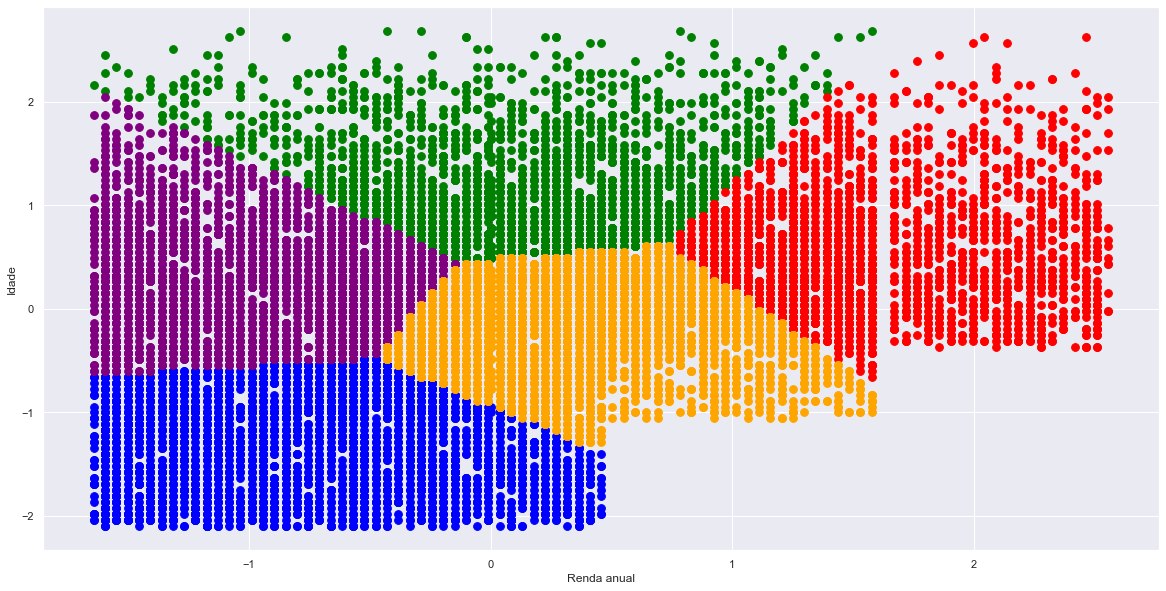

In [552]:
# Visualização da distrbuição dos grupos ou clusters num plano de idade por renda anual

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter(clientes_processado['renda_anual_processada'][clientes_processado['grupo'] == 0], clientes_processado['idade_processada'][clientes_processado['grupo'] == 0], c='blue', s=60)
ax.scatter(clientes_processado['renda_anual_processada'][clientes_processado['grupo'] == 1], clientes_processado['idade_processada'][clientes_processado['grupo'] == 1], c='green', s=60)
ax.scatter(clientes_processado['renda_anual_processada'][clientes_processado['grupo'] == 2], clientes_processado['idade_processada'][clientes_processado['grupo'] == 2], c='red', s=60)
ax.scatter(clientes_processado['renda_anual_processada'][clientes_processado['grupo'] == 3], clientes_processado['idade_processada'][clientes_processado['grupo'] == 3], c='purple', s=60)
ax.scatter(clientes_processado['renda_anual_processada'][clientes_processado['grupo'] == 4], clientes_processado['idade_processada'][clientes_processado['grupo'] == 4], c='orange', s=60)

plt.xlabel('Renda anual')
plt.ylabel('Idade')
plt.show()

In [558]:
clientes_processado = pd.concat([clientes_processado, \
                                 clientes['id'].reset_index(drop=True), \
                                 clientes['renda_anual'].reset_index(drop=True), \
                                 clientes['idade'].reset_index(drop=True)],
                                 axis=1)
clientes_processado

,idade_processada,renda_anual_processada,id,grupo,id,renda_anual,idade
0,0.034889,2.183473,0610b486422d4921ae7d2bf64640c50b,2,0610b486422d4921ae7d2bf64640c50b,112000,55
1,1.185430,-0.000036,78afa995795e4d85b5d9ceeca43f5fef,1,78afa995795e4d85b5d9ceeca43f5fef,65200,75
2,0.782741,0.223914,e2127556f4f64592b11af22de27a7932,1,e2127556f4f64592b11af22de27a7932,70000,68
3,0.610160,-0.569241,389bc3fa690240e798340f5a15918d5c,3,389bc3fa690240e798340f5a15918d5c,53000,65
4,0.207470,-0.662554,2eeac8d8feae4a8cad5a6af0499a211d,3,2eeac8d8feae4a8cad5a6af0499a211d,51000,58
...,...,...,...,...,...,...,...
14820,-0.540382,-0.522585,6d5f3a774f3d4714ab0c092238f3a1d7,0,6d5f3a774f3d4714ab0c092238f3a1d7,54000,45
14821,0.380051,0.317226,2cb4f97358b841b9a9773a7aa05a9d77,4,2cb4f97358b841b9a9773a7aa05a9d77,72000,61
14822,-0.310274,0.363882,01d26f638c274aa0b965d24cefe3183f,4,01d26f638c274aa0b965d24cefe3183f,73000,49
14823,1.645647,-0.709210,9dc1421481194dcd9400aec7c9ae6366,1,9dc1421481194dcd9400aec7c9ae6366,50000,83


In [559]:
# Grupo azul: Jovem e de renda mais baixa
clientes_processado[clientes_processado['grupo'] == 0].describe()

,idade_processada,renda_anual_processada,grupo,renda_anual,idade
count,3433.000000,3433.000000,3433.0,3433.000000,3433.000000
mean,-1.350889,-0.728625,0.0,49583.862511,30.910865
std,0.441678,0.550502,0.0,11799.122211,7.677745
min,-2.093613,-1.642333,0.0,30000.000000,18.000000
25%,-1.748451,-1.222428,0.0,39000.000000,24.000000
50%,-1.345761,-0.709210,0.0,50000.000000,31.000000
75%,-1.000599,-0.289304,0.0,59000.000000,37.000000
max,-0.482855,0.457195,0.0,75000.000000,46.000000


Os mais jovens tendem a serem mais atraídos por campanhas que utilizem digital influencers e que sejam autênticas. Os jovens são mais ativos nas plataformas Instagram, Tik Tok e YouTube. Conteúdos devem ser visualmente atraentes.
Por possuírem renda menor é essencial informá-los sobre descontos ou promoções. 

Fonte: https://dwdigital.com.br/canais-de-marketing-para-alcancar-a-geracao-z/

In [561]:
# Grupo verde: Mais velhos. Renda muito diversificada porém tendendo ao cento
clientes_processado[clientes_processado['grupo'] == 1].describe()

,idade_processada,renda_anual_processada,grupo,renda_anual,idade
count,2401.000000,2401.000000,2401.0,2401.000000,2401.000000
mean,1.271565,0.106999,1.0,67494.127447,76.497293
std,0.498233,0.539840,0.0,11570.592163,8.660837
min,0.495105,-1.642333,1.0,30000.000000,63.000000
25%,0.840268,-0.242648,1.0,60000.000000,69.000000
50%,1.185430,0.130601,1.0,68000.000000,75.000000
75%,1.645647,0.503851,1.0,76000.000000,83.000000
max,2.681134,1.576943,1.0,99000.000000,101.000000


Tendo em vista que os mais velhos são mais ativos no facebook e WhatsApp, pode-se investir em campanhas que contatem-nos por essa rede social. Pessoas com mais idade também tendem a ser mais receptivas com campanhas presenciais.

Tendem a serem fiéis com as marcas que gostam. É importante gerar confiança neste tipo de cliente e focar as campanhas nos benefícios da marca. É possível criar promoções que premiem a fidelização como presente por pontos.

https://www.next4.com.br/marketing-digital-para-idosos-crescimento-exponencial-nos-ultimos-anos-e-muita-oportunidade-para-sua-empresa/

In [562]:
# Grupo vermelho: Grupo mais abastado e com a segunda maior idade média.
clientes_processado[clientes_processado['grupo'] == 2].describe()

,idade_processada,renda_anual_processada,grupo,renda_anual,idade
count,2380.000000,2380.000000,2380.0,2380.000000,2380.000000
mean,0.575353,1.621560,2.0,99956.302521,64.394958
std,0.575218,0.461246,0.0,9886.056507,9.999091
min,-0.655436,0.783788,2.0,82000.000000,43.000000
25%,0.149943,1.250350,2.0,92000.000000,57.000000
50%,0.495105,1.530287,2.0,98000.000000,63.000000
75%,0.955322,1.996849,2.0,108000.000000,71.000000
max,2.623607,2.556723,2.0,120000.000000,100.000000


É possível chamar a atenção desses grupos com os informativos, sem dar destaque a promoções para atraí-los, tendo em vista que possuem mais renda. As estratégias de fidelização e construção de boa reputação da marca utilizadas no grupo verde, dos mais velhos, deve ser mantida. Os canais de comunicação também (WhatsApp e Facebook).

In [563]:
# Grupo roxo: idade mediana para mais e renda baixa. 
clientes_processado[clientes_processado['grupo'] == 3].describe()

,idade_processada,renda_anual_processada,grupo,renda_anual,idade
count,3079.000000,3079.000000,3079.0,3079.000000,3079.000000
mean,0.300814,-0.958083,3.0,44665.800585,59.622605
std,0.506668,0.405842,0.0,8698.567559,8.807476
min,-0.597909,-1.642333,3.0,30000.000000,44.000000
25%,-0.080165,-1.315740,3.0,37000.000000,53.000000
50%,0.264997,-0.942491,3.0,45000.000000,59.000000
75%,0.667687,-0.615897,3.0,52000.000000,66.000000
max,2.048336,-0.149336,3.0,62000.000000,90.000000


Por se tratar de um grupo com renda baixa é importante informá-los de descontos e promoções. Possuem uma ampla gama de idades que vai da geração X aos mais idosos. Um misto dos canais de comunicação, desde e-mail às redes variadas é interessante neste caso.

In [564]:
# Grupo laranja: renda média e idade média
clientes_processado[clientes_processado['grupo'] == 4].describe()

,idade_processada,renda_anual_processada,grupo,renda_anual,idade
count,3532.000000,3532.000000,3532.0,3532.000000,3532.000000
mean,-0.201295,0.377998,4.0,73302.548131,50.894394
std,0.420992,0.423501,0.0,9077.064207,7.318146
min,-1.288234,-0.429273,4.0,56000.000000,32.000000
25%,-0.482855,0.037289,4.0,66000.000000,46.000000
50%,-0.195220,0.363882,4.0,73000.000000,51.000000
75%,0.149943,0.690476,4.0,80000.000000,57.000000
max,0.610160,1.576943,4.0,99000.000000,65.000000


A geração X é um grupo de faixa etária que consome informação no meio digital mas também de forma significativa nos veículos tradicionais como TV, rádio e jornal. É necessário mesclar neste grupo estratégias utilizadas para os grupos dos mais velhos também.

https://consumidormoderno.com.br/2021/06/18/estrategias-marketing-geracao-x/